> ### 인공지능학과 202192033 권윤형

> # 전체코드

In [ ]:
import cv2
import numpy as np
from pop import Util

Util.enable_imshow()

cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print("Not found camera")
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
# fourcc = cv2.VideoWriter_fourcc(*'X264')
# out = cv2.VideoWriter('pretzels.avi', fourcc, 30, (640,480))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#out = cv2.VideoWriter('pretzels.mp4', fourcc, 30, (int(width*2), int(height)))
out = cv2.VideoWriter('pretzels.mp4', fourcc, 30, (1280,480))


#print("init width: %d, init height: %d" % (width, height))

for _ in range(120):
    ret, frame = camera.read()
    if not ret:
        break

    edge_img = cv2.Canny(frame, 200, 200)
    edge_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2BGR)
    

    merged_img = np.hstack((frame, edge_img))
    
    out.write(merged_img)

    cv2.imshow("merged video", merged_img)

camera.release()
out.release()
cv2.destroyAllWindows()

## 출력결과
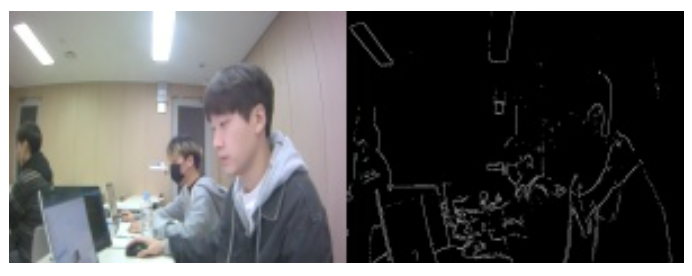

> # 기본 세팅
- 기존 코드와 동일

In [ ]:
import cv2
import numpy as np
from pop import Util

Util.enable_imshow()

cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print("Not found camera")
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)

> # 저장 관련 코드 변경사항

#### - X264 -> mp4v 
#### - pretzels.avi -> pretzels.mp4
#### - (640,480) -> (1280,480) or (int(width*2), int(height))
####


In [ ]:
#기존 코드
fourcc = cv2.VideoWriter_fourcc(*'X264')
out = cv2.VideoWriter('pretzels.avi', fourcc, 30, (640,480))

In [ ]:
#변경 코드
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

out = cv2.VideoWriter('pretzels.mp4', fourcc, 30, (int(width*2), int(height)))
#out = cv2.VideoWriter('pretzels.mp4', fourcc, 30, (1280,480))

> # 동영상 2개 결합 및 저장

#### - edge_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2BGR) : 원본 영상과 외곽선 영상의 채널값이 달라서
#### - merged_img = np.hstack((frame, edge_img)) : np.hstack 을 활용하여 영상 결합
#### - 나머지는 기존 코드와 동일
######

In [ ]:
for _ in range(120):
    ret, frame = camera.read()
    if not ret:
        break

    edge_img = cv2.Canny(frame, 200, 200)
    
    edge_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2BGR)
    
    merged_img = np.hstack((frame, edge_img))
    
    out.write(merged_img)

    cv2.imshow("merged video", merged_img)

    if cv2.waitKey(1) == ord('q'):
        break

camera.release()
out.release()
cv2.destroyAllWindows()